## Original Convolution Function

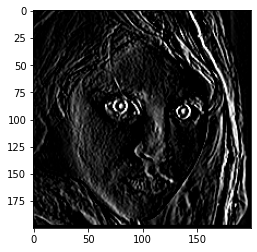

In [1]:
def convolve(image, kernel):

    # Get the image dimensions
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    # Empty array for our output image. Size of the input image.
    output = np.zeros((image_height, image_width))

    # All the rows except for the edge pixels.
    for y in range(image_height - kernel_height):
        # All the pixels except for the edge pixels.
        for x in range(image_width - kernel_width):

            # Mat or kernel frame. Part of the image to perform convolution.
            mat = image[y:y+kernel_height, x:x+kernel_width]

            # Perform convolution.
            output[y,x] = int(np.sum(np.multiply(mat, kernel)))

    # If the output has negative numbers clip to 0->255 range.
    if(np.min(output) < 0):
        output = np.clip(output,0,255)

    # return image
    return output

def apply_sobel_filter(image):
    # Define Sobel kernels
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    sobel_y = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ])
    
    # Apply Sobel filters
    gx = convolve(image, sobel_x)
    #gy = convolve(image, sobel_y)

    return(gx)

# import and show image
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

# Import image
img = cv2.imread('../Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = apply_sobel_filter(img)

plt.imshow(img, cmap='gray')

## Convolution Function with Padding

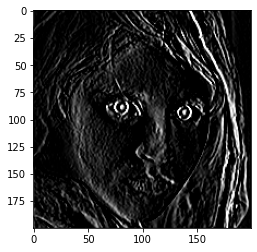

In [2]:
import numpy as np

# Works for padding of 1
def convolve_with_padding(image, kernel):
    # Get the image dimensions
    image_height, image_width = image.shape

    # Get the kernel dimensions
    kernel_height, kernel_width = kernel.shape

    # Empty buffer for output image. 
    output = np.zeros((image_height, image_width))

    # Calculate the padding needed to make the output image the same size as the input
    # You can also use the method the you had in your notebook.  Floor division. 
    padding_height = kernel_height  // 2
    padding_width = kernel_width // 2

    # Create an empty image with the padded dimensions.  
    padded_image = np.zeros((image_height + (kernel_height-1), image_width + (kernel_width-1)))

    # Copy the original image into the padded image. You can also use your own approach or np.pad() 
    padded_image[padding_height:-padding_height, padding_width:-padding_width] = image

    for y in range(image_height):
        # All the pixels
        for x in range(image_width):
            
            # Extract the region of interest (ROI) from the padded image
            mat = padded_image[y:y + kernel_height, x:x + kernel_width]

            # Perform convolution
            output[y, x] = int(np.sum(np.multiply(mat, kernel)))

    # If the output has negative numbers, clip to the 0-255 range
    output = np.clip(output, 0, 255)

    return np.uint8(output)

def apply_sobel_filter(image):
    # Define Sobel kernels
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    sobel_y = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ])
    
    # Apply Sobel filters
    gx = convolve_with_padding(image, sobel_x)
    gy = convolve(image, sobel_y)

    return(gx)

# import and show image
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

# Import image
img = cv2.imread('../Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = apply_sobel_filter(img)

plt.imshow(img, cmap='gray')
